In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print("Non-Fraud Transactions : ",len(df[df.Class == 0]))
print("Fraud Transactions : ",len(df[df.Class == 1]))

Non-Fraud Transactions :  284315
Fraud Transactions :  492


In [16]:
X = df.drop(['Class','Time'], axis=1)
y = df['Class']
print("feature shape : ", X.shape)
print("label shape : ", y.shape)

feature shape :  (284807, 29)
label shape :  (284807,)


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [19]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)




In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logistic Regression = ", accuracy_score(y_test, prediction))

Accuracy for Logistic Regression =  0.9991046662687406


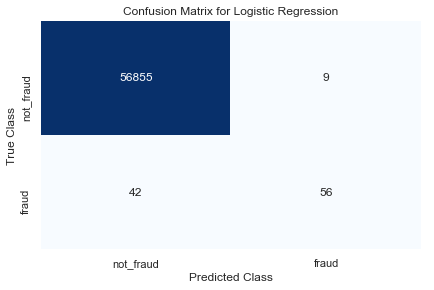

In [21]:
from sklearn.metrics import confusion_matrix

class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [23]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [25]:
print("Accuracy for Decision Tree Classifier = ",accuracy_score(y_test, pred))

Accuracy for Decision Tree Classifier =  0.9990871107053826


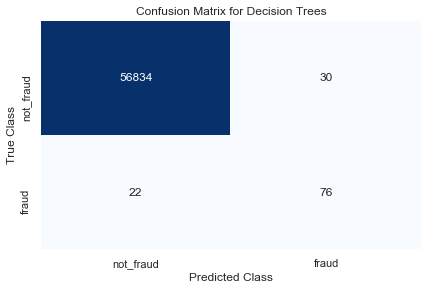

In [26]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for Decision Trees"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [27]:
# Neural Network

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

model = Sequential()
model.add(Dense(60, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,verbose=1, nb_epoch=5,batch_size=100,validation_split=0.2)


Using TensorFlow backend.
C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 182276 samples, validate on 45569 samples
Epoch 1/5
182276/182276 [==============================] - 2s 12us/step - loss: 0.0254 - acc: 0.9980 - val_loss: 0.0067 - val_acc: 0.9992
Epoch 2/5
182276/182276 [==============================] - 2s 12us/step - loss: 0.0058 - acc: 0.9993 - val_loss: 0.0062 - val_acc: 0.9992
Epoch 3/5
182276/182276 [==============================] - 2s 12us/step - loss: 0.0052 - acc: 0.9993 - val_loss: 0.0047 - val_acc: 0.9993
Epoch 4/5
182276/182276 [==============================] - 2s 11us/step - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0037 - val_acc: 0.9994
Epoch 5/5
182276/182276 [==============================] - 2s 11us/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.0048 - val_acc: 0.9993


In [28]:
y_pred = model.predict(X_test)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0
y_pred = y_pred.astype(int)
print("Accuracy for Neural Network",accuracy_score(y_test, y_pred))

Accuracy for Neural Network 0.9992626663389628


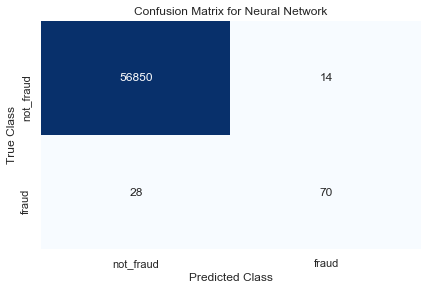

In [30]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()